<a href="https://colab.research.google.com/github/ShreyasJothish/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
# Libarary imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

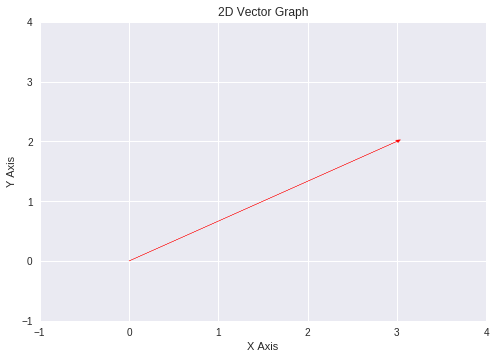

In [2]:
a = np.array([3, 2])

plt.arrow(0, 0, a[0], a[1], 
          head_width= .05, head_length=0.05 , color ='red')

plt.xlim(-1,4)          
plt.ylim(-1,4)
plt.title("2D Vector Graph")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [3]:
b = np.array([17, -4, -2, 1])

print("Norm of vector b is:", np.linalg.norm(b))

Norm of vector b is: 17.60681686165901


**Answer:** The Norm or Magnitude of a vector represents the length of the vector.

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [4]:
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])

print("Dot product of vectors c and d is:", np.dot(c, d))


Dot product of vectors c and d is: 42


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [5]:
E = np.array([[7, 4, 2],
             [1, 3, -1],
             [2, 6, -4]])

print("Inverse of E is:\n", np.linalg.inv(E))
print("Transpose of E is:\n",E.T)

Inverse of E is:
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
Transpose of E is:
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [6]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [7]:
print("The mean and standard deviation are present in mean and std rows\n")
print(df.describe())
print("The variance of customers is:", df.customers.var(ddof=0))
print("The variance of snow is:", df.snow.var(ddof=0))

The mean and standard deviation are present in mean and std rows

         customers      snow
count     7.000000  7.000000
mean   1135.714286  2.714286
std     314.264069  2.927700
min     760.000000  0.000000
25%     905.000000  0.500000
50%    1080.000000  1.000000
75%    1350.000000  5.000000
max    1600.000000  7.000000
The variance of customers is: 84653.06122448981
The variance of snow is: 7.346938775510203


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

**Answer:** Covariances of customers and snow are not directly comparable since there units are different. Better measure would be using Correlation Co-efficient.

A large positive or negative covariance indicates a strong relationship between two variables. However, you can't necessarily compare covariances between sets of variables that have a different scale, since the covariance of variables that take on high values will always be higher than since covariance values are unbounded, they could take on arbitrarily high or low values. This means that you can't compare the covariances between variables that have a different scale. Two variables positive covariance variable that has a large scale will always have a higher covariance than a variable with an equally strong relationship, yet smaller scale. This means that we need a way to regularlize

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [8]:
print("Variance-covariance matrix:", df.cov())

Variance-covariance matrix:               customers        snow
customers  98761.904762  670.238095
snow         670.238095    8.571429


In [9]:
print("For standarized comparison Correlation Co-efficient matrix:", df.corr())

For standarized comparison Correlation Co-efficient matrix:            customers      snow
customers   1.000000  0.728463
snow        0.728463  1.000000


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [10]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Country,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,England,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,Wales,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,Scotland,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,North Ireland,209,93,674,1033,143,586,355,187,334,1506,139


In [11]:
# Only numeric columns in dataframe for pasing to PCA

X = df.drop('Country', axis=1)
X.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139


In [12]:
# We'll also turn the X dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_X = X.values
print(numpy_X)

[[ 375   57  245 1472  105   54  193  147 1102  720  253  685  488  198
   360 1374  156]
 [ 475   73  227 1582  103   64  235  160 1137  874  265  803  570  203
   365 1256  175]
 [ 458   53  242 1462  103   62  184  122  957  566  171  750  418  220
   337 1572  147]
 [ 135   47  267 1494   66   41  209   93  674 1033  143  586  355  187
   334 1506  139]]


In [13]:
# Standardizing the data using StandardScaler
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler().fit_transform(X)
print(scaled_data)

[[ 0.10499766 -0.05191741 -0.01749546 -0.64432226  0.65827466 -0.13830319
  -0.63242919  0.64458535  0.73740709 -0.45007561  0.86331183 -0.25954622
   0.37773603 -0.33626508  0.80547723 -0.43523112  0.13055067]
 [ 0.84182336  1.60943981 -1.27716878  1.67946294  0.53580495  0.96812236
   1.53589947  1.15244047  0.9292974   0.43569619  1.09352832  1.19885635
   1.40168163  0.08406627  1.17160324 -1.40423624  1.54795798]
 [ 0.71656299 -0.46725672 -0.22744102 -0.85557546  0.53580495  0.74683725
  -1.09707105 -0.33205912 -0.0575671  -1.33584741 -0.70983418  0.54381113
  -0.49636387  1.51319287 -0.87870243  1.19072664 -0.54085279]
 [-1.66338402 -1.09026568  1.52210526 -0.17956522 -1.72988456 -1.57665641
   0.19360077 -1.4649667  -1.60913739  1.35022682 -1.24700598 -1.48312126
  -1.28305378 -1.26099406 -1.09837804  0.64874072 -1.13765587]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

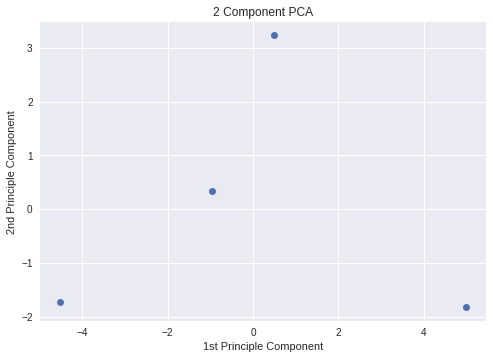

In [14]:
# Principal Component Analysis
from sklearn.decomposition import PCA

# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(scaled_data)

# transform data
transformed_data = pca.transform(scaled_data)
#print("\n Projected Data: \n", T)

xx, xy = transformed_data.T
plt.plot(xx,xy,'o')
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component")
plt.title("2 Component PCA")
plt.show()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [15]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [16]:
# We'll also turn the dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_points = points.values
print(numpy_points)

[[ -7.84680264  -3.42127666]
 [ -3.55432332  -6.88472945]
 [ -0.19282234  -9.67103016]
 [ -6.40145554  -5.22397192]
 [ -0.8040258   -9.70445652]
 [ -4.9771936   -6.13883603]
 [ -8.11899027  -3.62410932]
 [ -8.1456292   -2.78795056]
 [ -3.56865911   5.40178102]
 [ -5.71170922  -6.80201318]
 [ -4.00606304  -7.99484628]
 [ -4.34701906  -7.07327411]
 [  0.02288488 -10.57220028]
 [ -4.65338805  -8.10057054]
 [ -8.26306683  -4.36478167]
 [ -1.78925444 -11.0957949 ]
 [ -7.56683375  -4.39166363]
 [ -3.00212691  -5.73856732]
 [ -2.57673872  -7.83223833]
 [  6.74057358   4.13730878]
 [ -7.96610489  -3.14997573]
 [  6.26556835   5.01331613]
 [  6.28517859   4.44708732]
 [  6.40527985   4.38379283]
 [ -2.68559499  -8.51265544]
 [ -5.28302702  -9.34170965]
 [  0.07097306 -10.11371322]
 [ -1.64051597   4.00264149]
 [ -4.60671171  -8.36655774]
 [ -4.6838594   -7.26710703]
 [ -3.16629032  -7.64623711]
 [ -2.56850303  -7.13484226]
 [ -0.09036863  -7.64228289]
 [  6.8415471    2.62542108]
 [ -6.41252467

In [0]:
# For selecting the K value
from sklearn.cluster import KMeans

sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

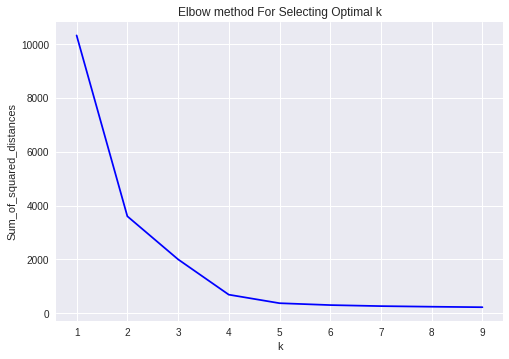

In [18]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method For Selecting Optimal k')
plt.show()

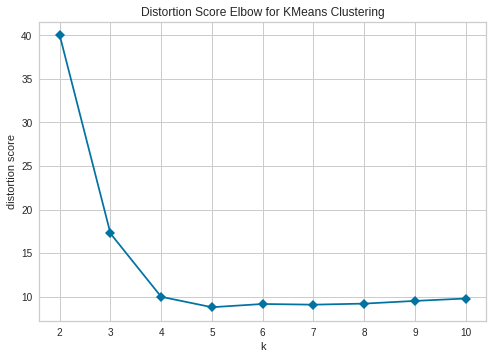

In [19]:
# Alternative method for selecting K using KElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=10, 
                              timings=False)

visualizer.fit(points)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

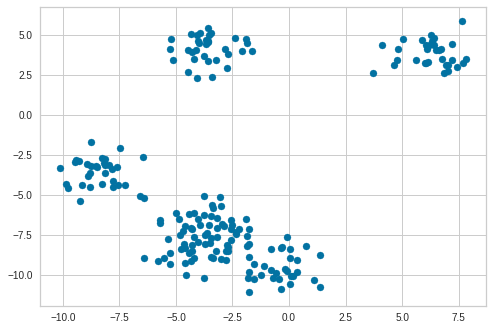

In [20]:
# Visualize the data points using scatter plot

plt.scatter('x', 'y', data=points)
plt.show()

In [21]:
# KMeans with K set to 4 based on above graphs.
from sklearn.cluster import KMeans

kmeans_val = KMeans(n_clusters=4, random_state=0).fit(points)
print("labels:\n", kmeans_val.labels_)
print("cluster centers:\n", kmeans_val.cluster_centers_)

print("cluster inertia:\n", kmeans_val.inertia_)

labels:
 [3 1 1 3 1 1 3 3 0 1 1 1 1 1 3 1 3 1 1 2 3 2 2 2 1 1 1 0 1 1 1 1 1 2 1 1 1
 1 0 1 1 2 0 0 0 1 1 1 3 1 2 3 3 0 2 1 1 0 0 3 2 1 3 0 2 0 2 0 3 0 1 1 1 1
 2 2 1 1 0 2 0 1 1 1 0 1 0 1 1 2 0 1 2 1 1 1 1 1 1 1 1 1 3 1 1 2 3 3 3 2 1
 2 1 3 1 1 0 0 2 0 2 1 1 3 1 3 1 2 0 3 1 3 1 3 0 0 1 2 3 1 0 1 1 2 1 0 1 0
 3 1 1 1 3 2 1 0 1 2 1 3 1 1 0 3 2 2 1 0 1 1 3 1 0 2 1 1 1 1 1 3 1 1 1 1 1
 1 3 2 0 1 1 3 2 3 1 0 2 2 1 1]
cluster centers:
 [[-3.59740679  4.13344099]
 [-2.73359305 -8.20435304]
 [ 6.24979318  3.84457183]
 [-8.36652987 -3.61238083]]
cluster inertia:
 691.0778792366671


In [22]:
kmeans_points = pd.DataFrame(kmeans_val.labels_, columns=['label'])
points_for_plot = points.join(kmeans_points)
points_for_plot.head()

,x,y,label
0,-7.846803,-3.421277,3
1,-3.554323,-6.884729,1
2,-0.192822,-9.671030,1
3,-6.401456,-5.223972,3
4,-0.804026,-9.704457,1


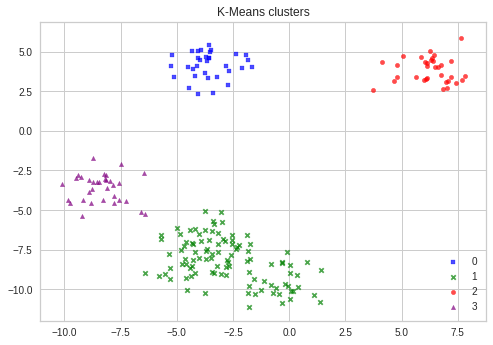

In [23]:
import matplotlib.pyplot as plt
from mlxtend.plotting import category_scatter

fig = category_scatter(x='x', y='y', label_col='label', 
                       data=points_for_plot, legend_loc='lower right')
plt.title("K-Means clusters")
plt.show()